This notebook serves as an introduction to working with Python's widely used Pandas library 

We will cover the following topics in this notebook:
1. [Basics of Pandas](#basics)
    - [Importing and Loading Packages](#import)
<br>
<br>
2. [Dataframes: Working with Tabular Data](#dataframes)
    - [Creating a Dataframe](#creating)
    - [Accessing Values in Dataframe](#accessing)
    - [Manipulating Data](#manipulating)
<br>
<br>
3. [Visualizing Data](#visualizing)
    - [Histograms](#histograms)
    - [Line Plots](#line)
    - [Scatter Plots](#scatter)
    - [Bar Plots](#bar)

## 1. Basics <a id='basics'></a>

This notebook assumes familiarity with Python concepts, syntax and data structure. For a brief refresher on some Python concepts, refer to this "Introduction for Python Basics" `python_basics.ipynb`

Python has a great ecosystem of data-centric packages which makes it excellent for data analysis. Pandas is one of those packages, and makes importing and analyzing data much easier. Pandas builds on packages like NumPy and matplotlib to give us convenient place to do most of our data analysis and visualization work.

### 1.1 Importing and Loading Packages <a id='import'></a>

Once we have installed anaconda, we do not need to reinstall the packages when we open a Jupyter notebook. We can simply import them using the `import` keyword. Since we import Pandas as `pd`, we need to prefix all functions with `pd`, similar to how we prefix all numpy functions with `np` (such as `np.append()`).

In [28]:
# run this cell to import the following packages
# import the pandas library. pd is a common shorthand for pandas
import pandas as pd
 # import numpy for working with numbers
import numpy as np

## 2. Dataframes: Working with Tabular Data <a id='dataframes'></a>

In this section, we will go over some basic commands to work with tabular data in Pandas

### 2.1 Creating a Dataframe <a id='creating'> </a>

Pandas introduces a data structure (i.e. dataframe) that represents data as a table with columns and rows. 

In Pandas, we can use the function `pd.DataFrame` to initialize a dataframe from a dictionary or a list-like object. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for more information

In [30]:
# example: creating a dataframe from a dictionary
dt_from_dict = pd.DataFrame({'letter':['a','b','c','z'],
                            'counts' :[9,3,3,1],
                            'points': [1,2,2,10]})
dt_from_dict

,letter,counts,points
0,a,9,1
1,b,3,2
2,c,3,2
3,z,1,10


More often, we will need to create a dataframe by importing data from a .csv file. In Pandas, we use `pd.read_csv()` to read data from a csv file. Sometimes, depending on the data file, we may need to specify the parameters `sep`, `header` or `encoding` as well. For a full list of parameters, refer to [this guide](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [32]:
# reading baby.csv (located in current working directory)
baby = pd.read_csv('baby.csv')
baby.head()
# display first few rows of dataframe
# baby

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


In [34]:
# view summary of data
baby.describe()
# Transpose the lay out
#baby.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1174.0,587.500000,339.048915,1.0,294.25,587.5,880.75,1174.0
Birth.Weight,1174.0,119.462521,18.328671,55.0,108.00,120.0,131.00,176.0
Gestational.Days,1174.0,279.101363,16.010305,148.0,272.00,280.0,288.00,353.0
Maternal.Age,1174.0,27.228279,5.817839,15.0,23.00,26.0,31.00,45.0
Maternal.Height,1174.0,64.049404,2.526102,53.0,62.00,64.0,66.00,72.0
Maternal.Pregnancy.Weight,1174.0,128.478705,20.734282,87.0,114.25,125.0,139.00,250.0


### 2.2 Accessing Values in Dataframe <a id='accessing'> </a>

In Pandas, columns are also known as Series. We can access a Pandas series by using the square bracket notation.

In [35]:
# returns Series object
baby['Birth.Weight']

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth.Weight, Length: 1174, dtype: int64

If we want a numpy array of column values, we can call the method `values` on a Series object:

In [37]:
baby['Birth.Weight'].values
print(len(baby['Birth.Weight'].values))

1174


In Pandas, we can access rows and column by their position using the `iloc` method. We need to specify the rows and columns we want in the following syntax: `df.iloc[<rows>, <columns>]`. For more information on indexing, refer to [this guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [38]:
# selecting first two rows using iloc
baby.iloc[0:2,:]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False


In [39]:
# specifying row indices
baby.iloc[[1,4,6],:]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,2,113,282,33,64,135,False
4,5,136,286,25,62,93,False
6,7,132,245,23,65,140,False


We can also access a specific value in the dataframe by passing in the row and column indices:

In [40]:
# get value in second row, third column
baby.iloc[1,2]
#


282

In [41]:
baby.iloc[:,1]

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth.Weight, Length: 1174, dtype: int64

### 2.3 Manipulating Data <a id='manipulating'></a>

**Adding Columns**


In Pandas, we can use the bracket notation and assign a list to add to the dataframe as follows:

In [43]:
# adding a new column
dt_from_dict['newcol'] =[5,6,7,8]
dt_from_dict

,letter,counts,points,newcol
0,a,9,1,5
1,b,3,2,6
2,c,3,2,7
3,z,1,10,8


We can also add an existing column to the new dataframe as a new column by performing an operation on it:

In [47]:
# adding count * 2 to the dataframe
dt_from_dict['doublecount'] = dt_from_dict['counts']**2+dt_from_dict['points'] 
dt_from_dict

,letter,counts,points,newcol,doublecount
0,a,9,1,5,82
1,b,3,2,6,11
2,c,3,2,7,11
3,z,1,10,8,11


**Selecting Columns**


In Pandas, we use a double bracket notation to select columns. This returns a dataframe, unlike a Series object when we only use single bracket notation

In [48]:
# double bracket notation for new dataframe
dt_from_dict[['counts','doublecount']]

,counts,doublecount
0,9,82
1,3,11
2,3,11
3,1,11


**Filtering Rows Conditionally**



In Pandas, we can use the bracket notation to subset the dataframe based on a condition. We first specify a condition and then subset using the bracket notation:

In [49]:
# array of booleans
baby['Maternal.Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal.Smoker, Length: 1174, dtype: bool

In [52]:
# filter rows by condition Maternal.Smoker == True
baby[baby['Maternal.Smoker'] == True]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
8,9,143,299,30,66,136,True
10,11,144,282,32,64,124,True
11,12,141,279,23,63,128,True
...,...,...,...,...,...,...,...
1162,1163,143,281,28,65,135,True
1163,1164,113,287,29,70,145,True
1164,1165,109,244,21,63,102,True
1165,1166,103,278,30,60,87,True


In [56]:
# filtering with multiple conditions
dt_from_dict
dt_from_dict[(dt_from_dict['points']>1) & (dt_from_dict['doublecount']<80)]

,letter,counts,points,newcol,doublecount
1,b,3,2,6,11
2,c,3,2,7,11
3,z,1,10,8,11


**Renaming Columns**

Pandas uses `rename()`, which has an `index` parameter that needs to be set to `str` and a `columns` parameter that needs to be set to a dictionary of the names to be replaced with their replacements:

In [57]:
# rename 'points' to 'other name'
dt_from_dict.rename(index=str, columns= {"points":"other name"})

,letter,counts,other name,newcol,doublecount
0,a,9,1,5,82
1,b,3,2,6,11
2,c,3,2,7,11
3,z,1,10,8,11


**Sorting Columns**

In Pandas, we use the `sort_values()` to sort by column. We need the `by` parameter to specify the row we want to sort by and the optional parameter `ascending = False` if we want to sort in descending order:

In [59]:
# sort by count, descending
dt_from_dict.sort_values(by = ['counts'], ascending =False )

,letter,counts,points,newcol,doublecount
3,z,1,10,8,11
1,b,3,2,6,11
2,c,3,2,7,11
0,a,9,1,5,82


**Grouping and Aggregating**


In Pandas, we use `groupby()` to group the dataframe. This function returns a groupby object, on which we can then call an aggregation function to return a dataframe with aggregated values for other columns. For more information, refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [61]:
# selecting two columns for brevity
df_subset = dt_from_dict[['counts','points']]
df_subset

,counts,points
0,9,1
1,3,2
2,3,2
3,1,10


In [68]:
count_sums_df = df_subset.groupby(['counts']).sum()
count_sums_df

,points
counts,
1,10
3,4
9,1


**Pivot Tables**


In Pandas, we use `pd.pivot_table()` to create a contingency table. The argument `columns` sets the column names of the pivot table. The argument `index` sets the first column of the pivot table or the keys to group on. For more information, refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [69]:
# creating new dataframe
cones_df = pd.DataFrame({"Flavor":['strawberry','chocolate','chocolate','strawberry','chocolate','bubblegum'],
                        "Color": ['pink','light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
                        "Price":[3.55,4.75,5.25, 5.25, 5.25, 4.75]})
cones_df

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [70]:
# creating the pivot table
pd.pivot_table(cones_df, columns=["Flavor"], index = ["Color"])

Price                     
Flavor      bubblegum chocolate strawberry
Color                                     
dark brown        NaN      5.25        NaN
light brown       NaN      4.75        NaN
pink             4.75       NaN        4.4

If there is no data in the groups, then Pandas will output `NaN` values. 

We can also specify the parameters like `values` and `aggfunc` 

In [72]:
# additional arguments
pd.pivot_table(cones_df, columns=["Flavor"], index = ["Color"], values ="Price", aggfunc = np.sum)
# additional arguments
pd.pivot_table(cones_df, columns=["Flavor"], index = ["Color"], values ="Price", aggfunc = np.min)


Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,NaN,5.25,NaN
light brown,NaN,4.75,NaN
pink,4.75,NaN,3.55


**Joining/Merging**


In Pandas, we can use the `merge()` function to join two tables together. The first parameter is the name of the second table to join on. The parameters `left_on` and `right_on` specify the columns to use in the left and right tables respectively. There are more parameters such as `how` which specify what kind of join to perform (Inner (Default), Outer, Left, Right). For more information, refer to this [Kaggle Tutorial](https://www.kaggle.com/crawford/python-merge-tutorial/notebook)

![title](1.png)

In [73]:
# creating new ratings df
rating_df = pd.DataFrame({"Kind" : ['strawberry','chocolate','vanilla'],
                         "Stars": [2.5, 3.5, 4.5]})
rating_df

,Kind,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla,4.5


In [79]:
# merging cones and ratings
cones_df.merge(rating_df, left_on="Flavor", right_on ="Kind",how='inner')

,Flavor,Color,Price,Kind,Stars
0,strawberry,pink,3.55,strawberry,2.5
1,strawberry,pink,5.25,strawberry,2.5
2,chocolate,light brown,4.75,chocolate,3.5
3,chocolate,dark brown,5.25,chocolate,3.5
4,chocolate,dark brown,5.25,chocolate,3.5


In [80]:
#Drop a duplicate column
new_df = cones_df.merge(rating_df, left_on="Flavor", right_on ="Kind",how='inner')
new_df.drop(columns=['Kind'])

#new_df.dropna

,Flavor,Color,Price,Stars
0,strawberry,pink,3.55,2.5
1,strawberry,pink,5.25,2.5
2,chocolate,light brown,4.75,3.5
3,chocolate,dark brown,5.25,3.5
4,chocolate,dark brown,5.25,3.5


## 3. Visualizing Data <a id='visualizing'> </a>

Plotting methods in Pandas are built on the library `matplotlib`

In this section we will go through examples of some plots in Pandas

In [49]:
# importing matplotlib for plotting
import matplotlib
%matplotlib inline

In Pandas, we use `hist()` to create histograms. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.hist.html) for a full list of parameters

array([[<AxesSubplot:title={'center':'Birth.Weight'}>]], dtype=object)

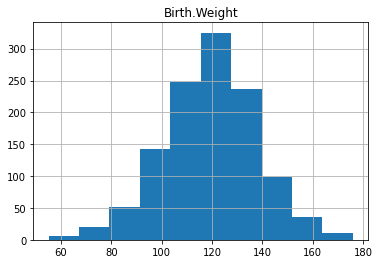

In [81]:
# creating a histogram
# baby
baby.hist('Birth.Weight')

<a id='line'></a>**3.2 Line Plots**


In Pandas, we can use `plot.line()` to create line plots. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.line.html)

<AxesSubplot:xlabel='Gestational.Days'>

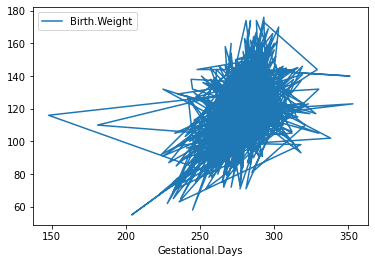

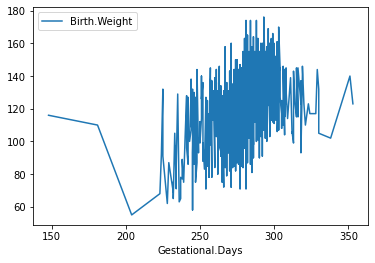

In [83]:
#Pandas
baby.plot.line(x='Gestational.Days', y="Birth.Weight")
baby.sort_values('Gestational.Days').plot.line(x='Gestational.Days', y="Birth.Weight")

<a id='scatter'></a>**3.3 Scatter Plots**



In Pandas, we use `plot.scatter()` to create a scatter plot. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.scatter.html)

<AxesSubplot:xlabel='Gestational.Days', ylabel='Birth.Weight'>

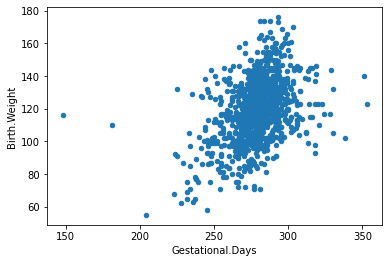

In [84]:
baby.plot.scatter(x='Gestational.Days', y="Birth.Weight")

<a id='bar'></a>**3.4 Bar Plots**



In Pandas, we use `plot.barh()` to create a bar chart. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.barh.html)

<AxesSubplot:ylabel='letter'>

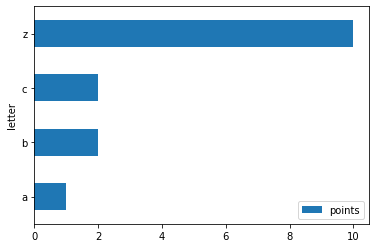

In [85]:
dt_from_dict.plot.barh(x='letter',y='points')

<AxesSubplot:xlabel='letter'>

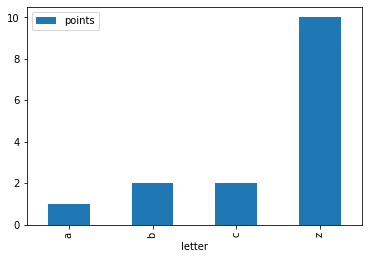

In [87]:
dt_from_dict.plot.bar(x='letter', y='points')

---

## Further Reading

Here is a list of useful Pandas resources:

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Dataquest Pandas Tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)
- [Pandas Cookbook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/)